In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
data = pd.read_csv("C:/Users/brend/OneDrive/Documents/College/STAT 436/Final Project/NCAA Champs Data.csv")
# check that it loaded properly
data.head()

,Year,SS,Time,Last Lap
0,2017,0,875.60,55.76
1,2017,0,875.88,56.19
2,2017,0,876.23,56.41
3,2017,0,876.57,56.31
4,2017,0,876.78,56.69


In [2]:
data.tail()

,Year,SS,Time,Last Lap
137,2023,1,868.89,65.75
138,2023,1,870.36,64.12
139,2023,1,877.57,70.46
140,2023,1,885.44,68.64
141,2023,1,889.31,71.26


In [3]:
print(data.shape)
# the dataset has 141 entries with 4 features
# each entry is an athlete
# features: Year (the year the athlete competed)
# SS: indicator variable; 0 means the event took place before the release of super spikes, 1 means after
# Time: each competitor's time for 5000 meters in seconds
# Last Lap: competitor's time (sec) for the last 400m of the race

(142, 4)


In [4]:
print(data.describe())
# the meaningful categories here are time and last lap; the others are labels
# the data is slightly left-skewed (mean < median)
# mean time is 846.74 seconds, or 14:06.74 with standard deviation 28.52 seconds
# median is 848.02 seconds, or 14:08.02
# mean last lap is 61.59 seconds with standard deviation 5.24

              Year         SS        Time    Last Lap
count   142.000000  142.00000  142.000000  142.000000
mean   2019.985915    0.50000  846.744366   61.586972
std       2.166757    0.50177   28.516079    5.240296
min    2017.000000    0.00000  792.270000   52.910000
25%    2018.000000    0.00000  824.782500   57.635000
50%    2020.000000    0.50000  848.020000   60.925000
75%    2022.000000    1.00000  867.620000   64.487500
max    2023.000000    1.00000  916.000000   75.720000


C:\Users\brend\AppData\Local\Temp\ipykernel_1548\3143065218.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Time'], kde = True, hist = 1)


<Axes: xlabel='Time', ylabel='Density'>

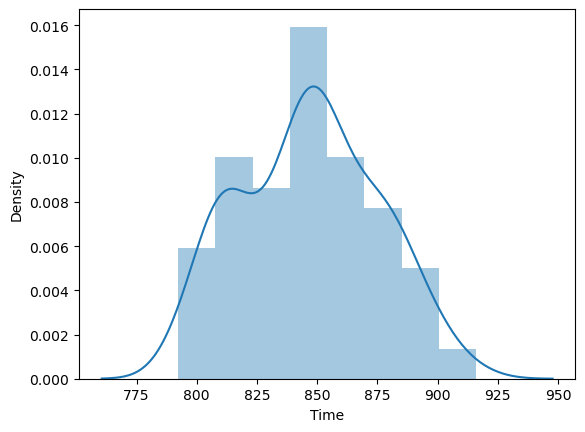

In [5]:
# plot the distribution of times run
sns.distplot(data['Time'], kde = True, hist = 1)
# the plot is somewhat symmetrical
# peak is around 850 (14:10), with a smaller peak around 820 (13:40)

C:\Users\brend\AppData\Local\Temp\ipykernel_1548\43024727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Last Lap'], kde = True, hist = 1)


<Axes: xlabel='Last Lap', ylabel='Density'>

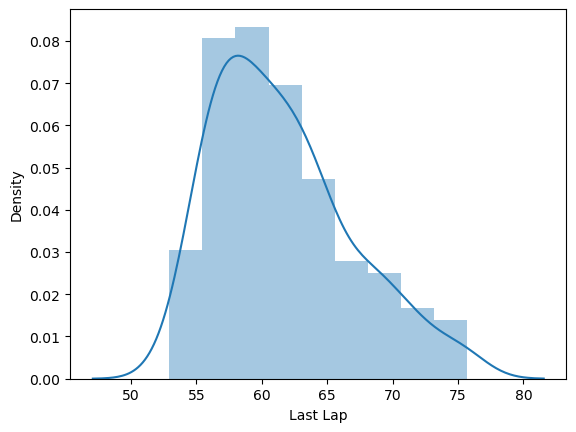

In [6]:
sns.distplot(data['Last Lap'], kde = True, hist = 1)
# the last lap is right-skewed with a peak around 58 seconds

In [7]:
features = data.drop('Year', axis=1)
x = features.drop('SS', axis=1) # dropping labels to leave only predictive features in x
y = data['SS']

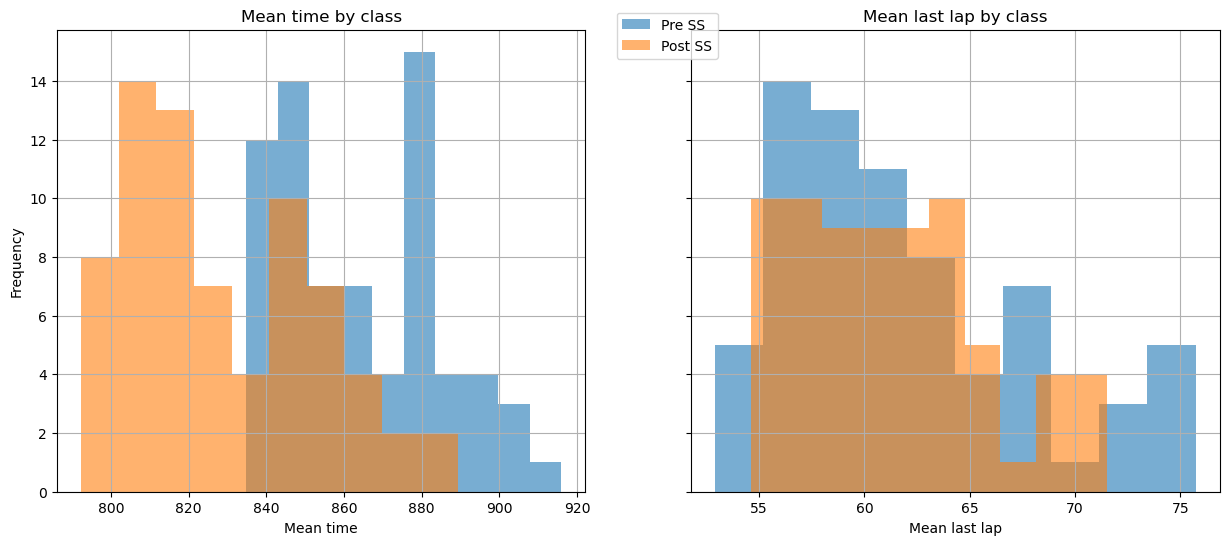

In [8]:
# plotting histograms of time and last lap separated by pre/post SS
fig1,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6),sharey=True)
grouped_data=data.groupby("SS")
grouped_data['Time'].hist(alpha=0.6,ax=ax[0])
grouped_data['Last Lap'].hist(alpha=0.6,ax=ax[1])
ax[0].set_title("Mean time by class")
ax[0].set_xlabel("Mean time")
ax[0].set_ylabel("Frequency")
ax[1].set_title("Mean last lap by class")
ax[1].set_xlabel("Mean last lap")
fig1.legend(["Pre SS","Post SS"],bbox_to_anchor=(0.57,0.92))
# lots of overlap in last lap, but total times are noticeably faster post SS

In [9]:
# fitting a k-NN model using cross-validation to find optimal k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_range = list(range(1, 11)) # total dataset is only 141, so k shouldn't be too large
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy') # cv=10 means 10 folds, so 90% train and 10% test each
    k_scores.append(scores.mean())
print(k_scores)
# best score (0.85) is with 2-NN 

[0.7928571428571429, 0.85, 0.8142857142857143, 0.8142857142857143, 0.7642857142857143, 0.8, 0.7714285714285714, 0.7928571428571429, 0.7714285714285716, 0.7785714285714286]


In [10]:
# separate into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10, shuffle = True)

In [11]:
# using the training set for k-NN with 2-NN (2 selected as best k)
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
# testing the 2-NN model
y_pred = knn_model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

In [13]:
# fitting a Perceptron model
from sklearn.linear_model import Perceptron
per_model1 = Perceptron(max_iter=500)
per_model1.fit(x_train, y_train)
per_model2 = Perceptron(max_iter=1000)
per_model2.fit(x_train, y_train)
per_model3 = Perceptron(max_iter=10000)
per_model3.fit(x_train, y_train)

Perceptron(max_iter=10000)

In [14]:
# testing the Perceptron models
per_scores = []
y_pred = per_model1.predict(x_test)
per_scores.append(accuracy_score(y_test, y_pred))
y_pred = per_model2.predict(x_test)
per_scores.append(accuracy_score(y_test, y_pred))
y_pred = per_model3.predict(x_test)
per_scores.append(accuracy_score(y_test, y_pred))
per_scores
# the model does not improve with more iterations

[0.5333333333333333, 0.5333333333333333, 0.5333333333333333]

In [15]:
# fitting a Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

GaussianNB()

In [16]:
# checking parameters of fitted NB model
print("Means:", gnb_model.theta_)
# the pre-ss era has means 863.998 (14:23.998) and 62.027
# the post-ss era has means 830.475 (13:50.475) and 61.416
print("Variances:", gnb_model.var_)
# the pre-ss era has standard deviations 20.992 and 7.837
# the post-ss era has standard deviations 24.513 and 4.553

Means: [[863.9978125   62.026875  ]
 [830.47460317  61.41587302]]
Variances: [[440.67799602  36.21404104]
 [600.88861612  20.73022504]]


In [17]:
# evaluating the Gaussian NB model on the training set
y_train_pred = gnb_model.predict(x_train)
accuracy_score(y_train, y_train_pred)
# not that accurate, only 74.02%

0.7401574803149606

In [18]:
# evaluating the Gaussian NB model on the test set
y_pred = gnb_model.predict(x_test)
accuracy_score(y_test, y_pred)
# performs much better on the test set- 86.67%
# model is not overfitting; performs better in testing than training

0.8666666666666667

In [19]:
# fitting a logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [20]:
# evaluating the Logistic Regression model on the training set
y_train_pred = lr_model.predict(x_train)
accuracy_score(y_train, y_train_pred)
# not that accurate, only 66.93%

0.6692913385826772

In [21]:
# evaluating the Logistic Regression model on the test set
y_pred = lr_model.predict(x_test)
accuracy_score(y_test, y_pred)
# performs much better on the test set- 86.67%
# model is not overfitting; performs better in testing than training
# performs the same as Naive Bayes

0.8666666666666667

In [22]:
# ranking the models
# 1. k-NN with k=2: accuracy = 0.933333
# 2. Gaussian NB and Logistic Regression: accuracy = 0.866667
# 4. Perceptron: accuracy = 0.533333
# the models, apart from perceptron, do a good job distinguishing between pre and post ss times
# this hints at super spikes improving runners' performance at the NCAA Championships

In [23]:
# presentation feedback: setting k as an even number allows for ties
# try an odd number to prevent this
# based on cross-validation from earlier, best odd k is 3 (accuracy 0.814)
knn_oddmodel = KNeighborsClassifier(n_neighbors=3)
knn_oddmodel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# testing the 3-NN model
y_pred2 = knn_oddmodel.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8666666666666667